In [1]:
import scipy
print(scipy.__version__)

1.8.0


In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [13]:
n = 40
sigma = 2.50
mu = 13.20
xbar = 12.20

In [32]:
ztest = (xbar - mu) / (sigma / np.sqrt(n))
ztest

-2.5298221281347035

In [37]:
pvalue=stats.norm.cdf(ztest)
pvalue

0.005706018193000826

In [38]:
alpha=0.01
if pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [5]:
df = pd.read_csv("soil - Sheet1.csv")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [11]:
indTest = stats.ttest_ind(df.Soil1,df.Soil2, nan_policy='omit')
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [13]:
alpha = 0.01      

if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [7]:
df1 = pd.read_csv("2015 PISA Test - Sheet1.csv")
df1.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [9]:
df1.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [10]:
df1.shape

(70, 6)

In [13]:
df1.isnull().sum()

Country Code              0
Continent_Code            5
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [15]:
df1.dropna(inplace = True)

In [16]:
df1.isnull().sum()

Country Code              0
Continent_Code            0
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

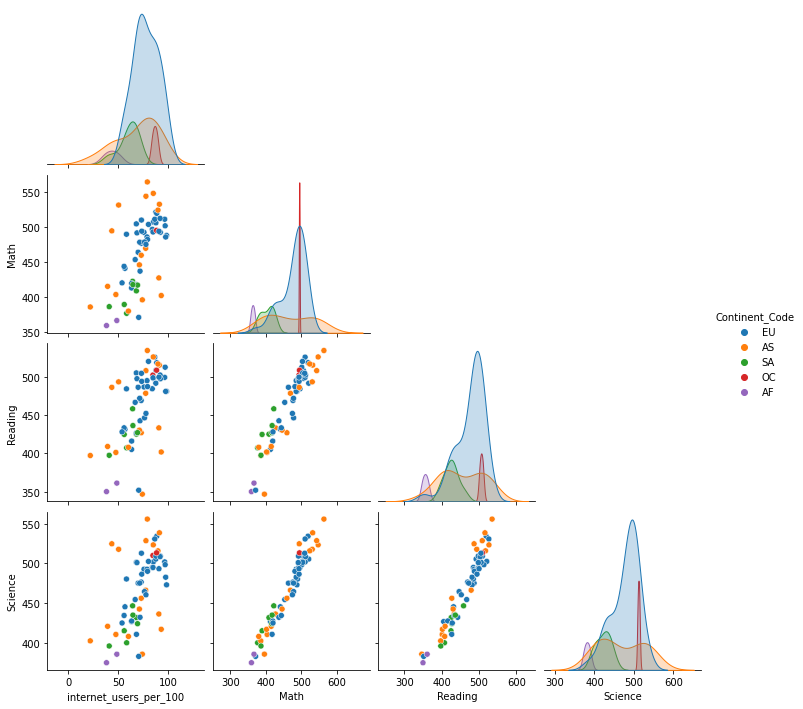

In [28]:
sns.pairplot(df1, hue = 'Continent_Code', corner = True);

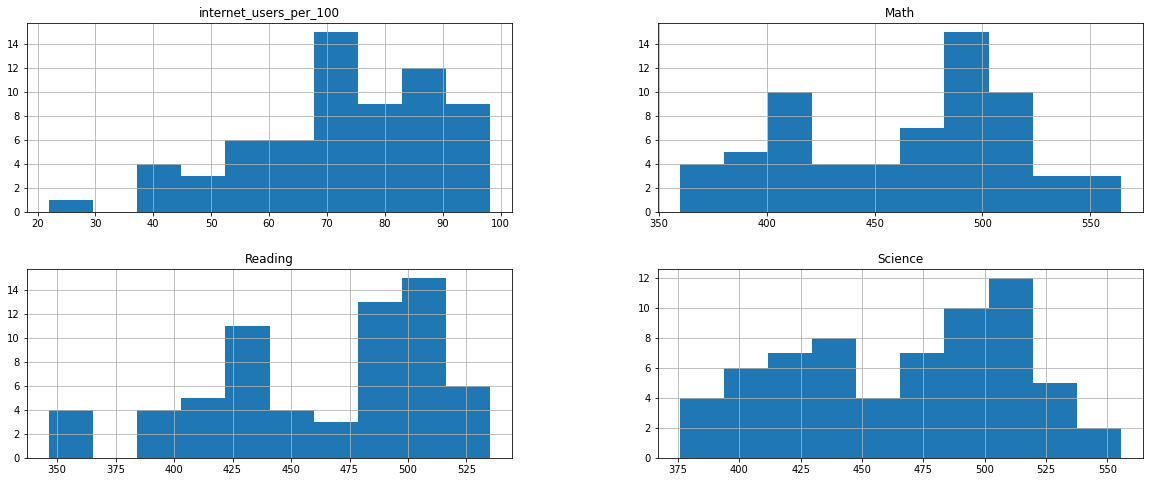

In [36]:
df1.hist(figsize=(20,8));

In [39]:
ab=df1.groupby("Continent_Code")["Country Code"].count()
ab

Continent_Code
AF     2
AS    17
EU    37
OC     2
SA     7
Name: Country Code, dtype: int64

C:\Users\YFHP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


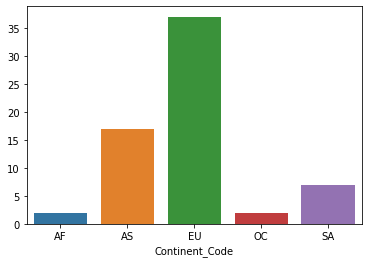

In [52]:
sns.barplot(ab.index,ab.values);

In [53]:
df1.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'AF'], dtype=object)

In [57]:
eu = df1[df1.Continent_Code=="EU"]
eu.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


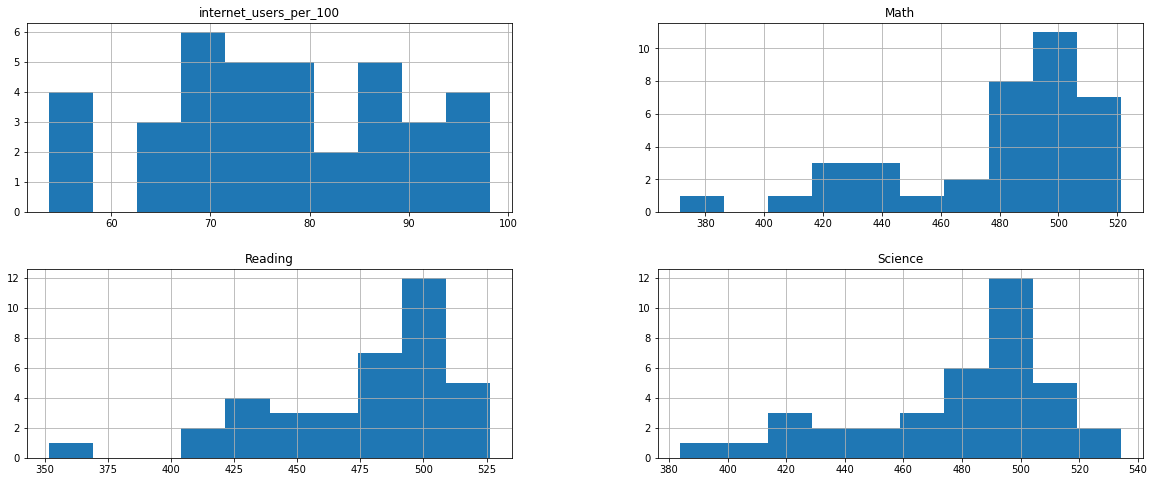

In [58]:
eu.hist(figsize=(20,8));

In [59]:
AS = df1[df1.Continent_Code=="AS"]
AS.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


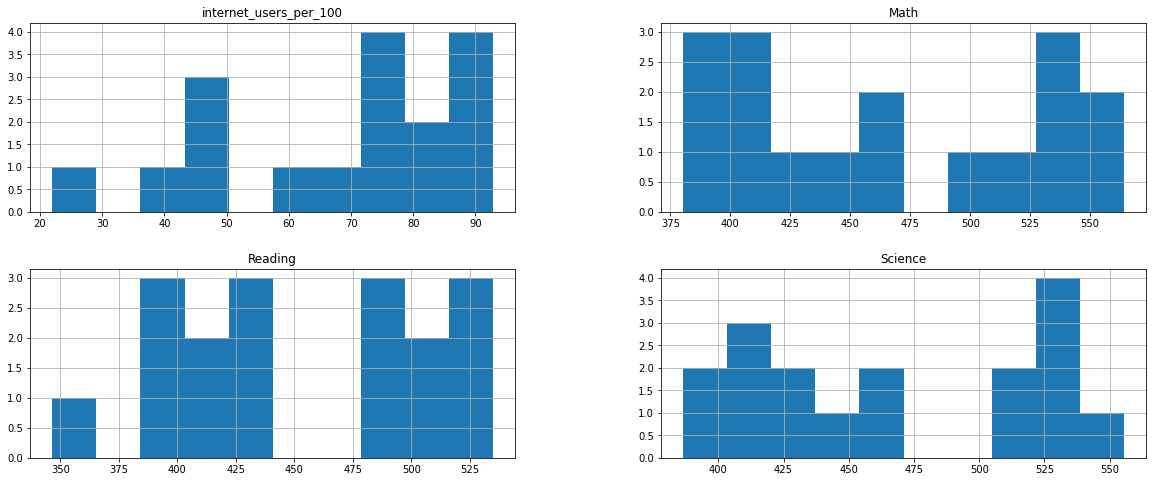

In [60]:
AS.hist(figsize=(20,8));

In [61]:
SA = df1[df1.Continent_Code=="SA"]
SA.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836


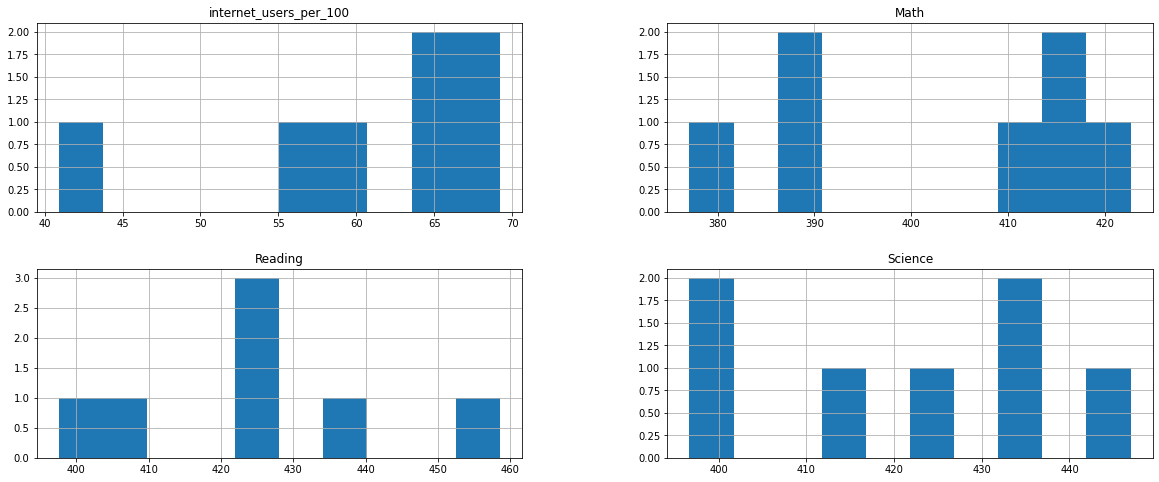

In [62]:
SA.hist(figsize=(20,8));

In [63]:
OC = df1[df1.Continent_Code=="OC"]
OC.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


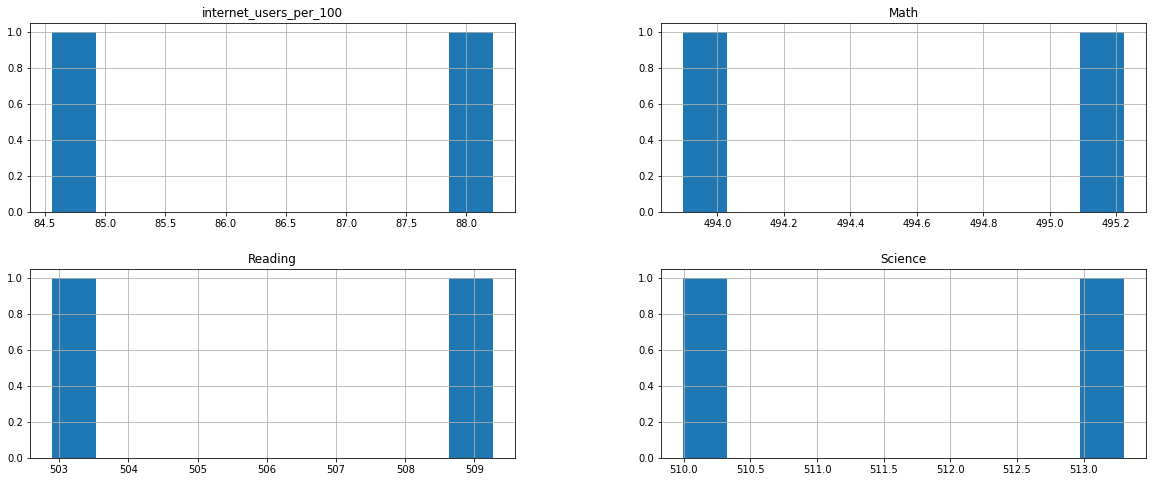

In [64]:
OC.hist(figsize=(20,8));

In [65]:
AF = df1[df1.Continent_Code=="AF"]
AF.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
65,TUN,AF,48.519836,366.8180,361.0555,386.4034


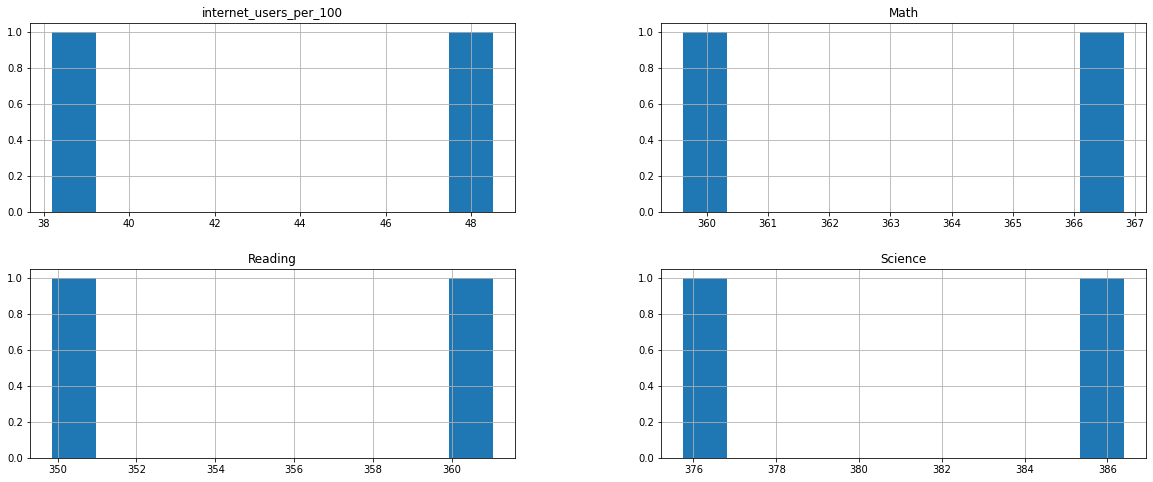

In [66]:
AF.hist(figsize=(20,8));

Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [69]:
stats.ttest_ind(eu.Math, AS.Math)

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

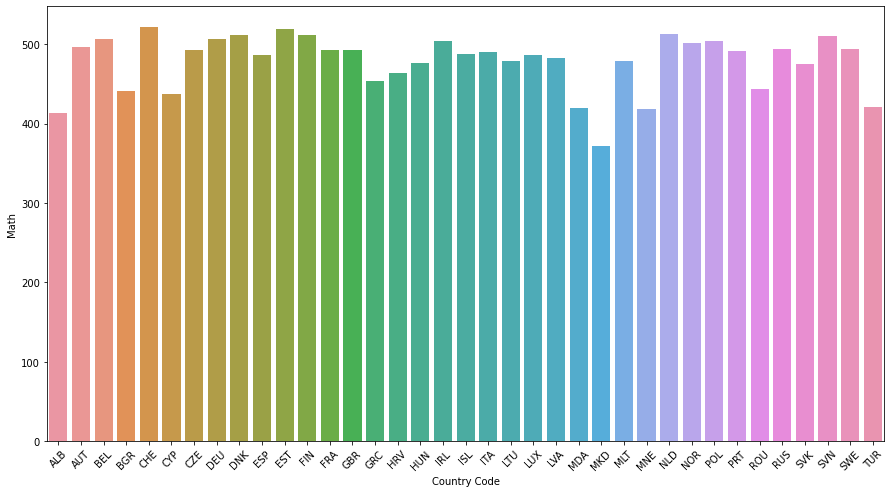

In [105]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y=eu.Math, x=eu["Country Code"])
#sns.barplot(y=AS.Math, x=AS["Country Code"],ax = ax[1])
ax.set_xticklabels(eu["Country Code"],rotation=45);

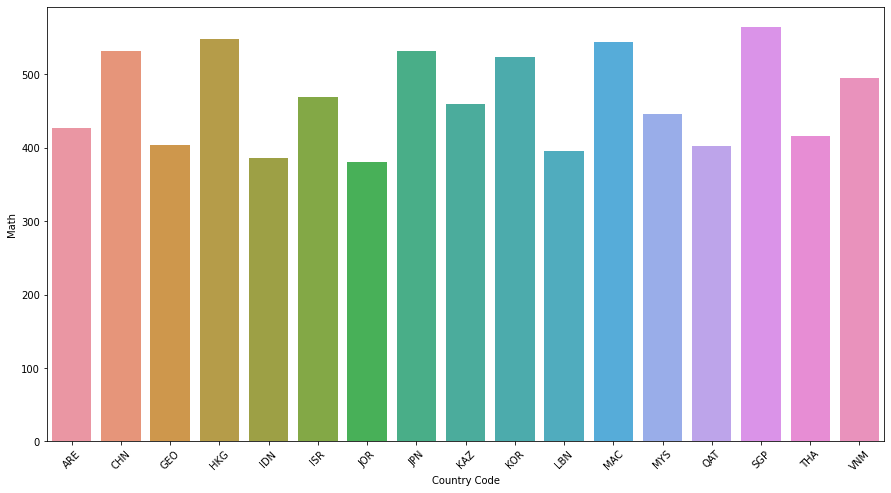

In [106]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y=AS.Math, x=AS["Country Code"])
ax.set_xticklabels(AS["Country Code"],rotation=45);

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

In [110]:
df2 = pd.read_csv("students_2014 - students_2014.csv", sep = ",", na_values = ".", index_col = 0)
df2.head()

,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
ids,,,,,,,,,,,,,,,,,,,,,
43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [111]:
df2.shape

(435, 22)

In [113]:
df2.isnull().sum()

bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [115]:
df2[["English"]].isnull().value_counts()

English
False      409
True        26
dtype: int64

In [116]:
df2[["Math"]].isnull().value_counts()

Math 
False    422
True      13
dtype: int64

In [119]:
df3 = df2[["English", "Math"]].dropna()
df3.head()

,English,Math
ids,,
43783,88.24,60.02
20278,89.45,70.19
20389,96.73,71.20
22820,74.06,55.89
24559,82.61,65.52


In [121]:
eng =df3['English'].mean()
eng

82.74409547738692

In [122]:
mat =df3['Math'].mean()
mat

65.44683417085427

In [123]:
paired = stats.ttest_rel(df3["English"], df3["Math"], nan_policy='omit')
paired

Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

In [126]:
alpha = 0.025

if paired.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
